In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import requests


In [79]:
app_token = 'QkxY0qxjBYHZnRw537W8EYTxZ'
endpoint = 'https://data.cityofchicago.org/resource/2i5w-ykuw.json'

headers = {'X-App-Token': app_token}
params = {
    '$select': 'vendor, count(trip_id)',
    '$group': 'vendor',
    '$order': 'count_trip_id DESC'
}
response = requests.get(endpoint, headers=headers, params=params)

In [80]:
data = response.json()
scooter_trips = pd.DataFrame(data)

scooter_trips

,vendor,count_trip_id
0,Lime,8134253
1,Lyft,4238610
2,Spin,305838
3,Link,126573
4,Coco,342


In [81]:
scooter_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   vendor         5 non-null      object
 1   count_trip_id  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [82]:
scooter_trips['count_trip_id'] = pd.to_numeric(scooter_trips['count_trip_id'])

In [83]:
scooter_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   vendor         5 non-null      object
 1   count_trip_id  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [84]:
vendor_total = scooter_trips['count_trip_id'].sum()

scooter_trips['market_share'] = (scooter_trips['count_trip_id'] / vendor_total * 100).round(2)

scooter_trips



,vendor,count_trip_id,market_share
0,Lime,8134253,63.52
1,Lyft,4238610,33.10
2,Spin,305838,2.39
3,Link,126573,0.99
4,Coco,342,0.00


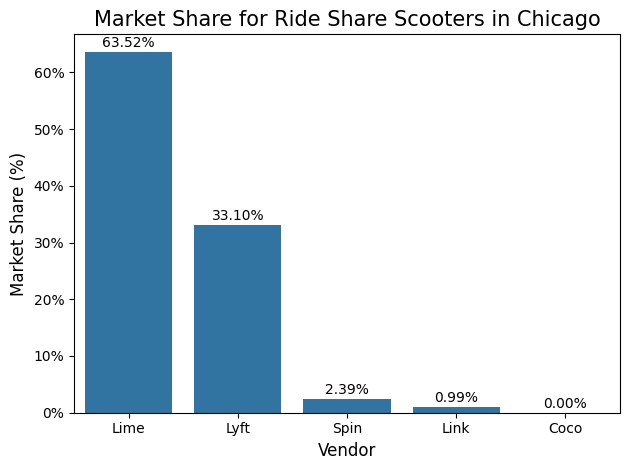

In [85]:
plt.Figure(figsize=(10,6))
ax = sns.barplot(data=scooter_trips, x='vendor', y='market_share')
plt.xlabel('Vendor', fontsize=12)
plt.ylabel('Market Share (%)', fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Market Share for Ride Share Scooters in Chicago', fontsize=15)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', fontsize=10, padding=1.5)

plt.tight_layout()
plt.show()

In [ ]:
params = {

    '$select': "date_trunc_ym(start_time) AS month, count(trip_id)",
    '$where': "vendor LIKE '%Lime%'",
    '$group': "month",
    '$order': "month ASC"
}
response_lime = requests.get(endpoint, headers=headers, params=params)

In [87]:
data = response_lime.json()

lime_df = pd.DataFrame(data)

lime_df.head()

,month,count_trip_id
0,2022-06-01T00:00:00.000,34837
1,2022-07-01T00:00:00.000,100559
2,2022-08-01T00:00:00.000,100440
3,2022-09-01T00:00:00.000,141479
4,2022-10-01T00:00:00.000,119519


In [88]:
lime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   month          32 non-null     object
 1   count_trip_id  32 non-null     object
dtypes: object(2)
memory usage: 644.0+ bytes


In [89]:
lime_df['month'] = pd.to_datetime(lime_df['month'])

In [90]:
lime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   month          32 non-null     datetime64[ns]
 1   count_trip_id  32 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 644.0+ bytes


In [91]:
lime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   month          32 non-null     datetime64[ns]
 1   count_trip_id  32 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 644.0+ bytes


In [92]:
lime_df['count_trip_id'] = pd.to_numeric(lime_df['count_trip_id'])

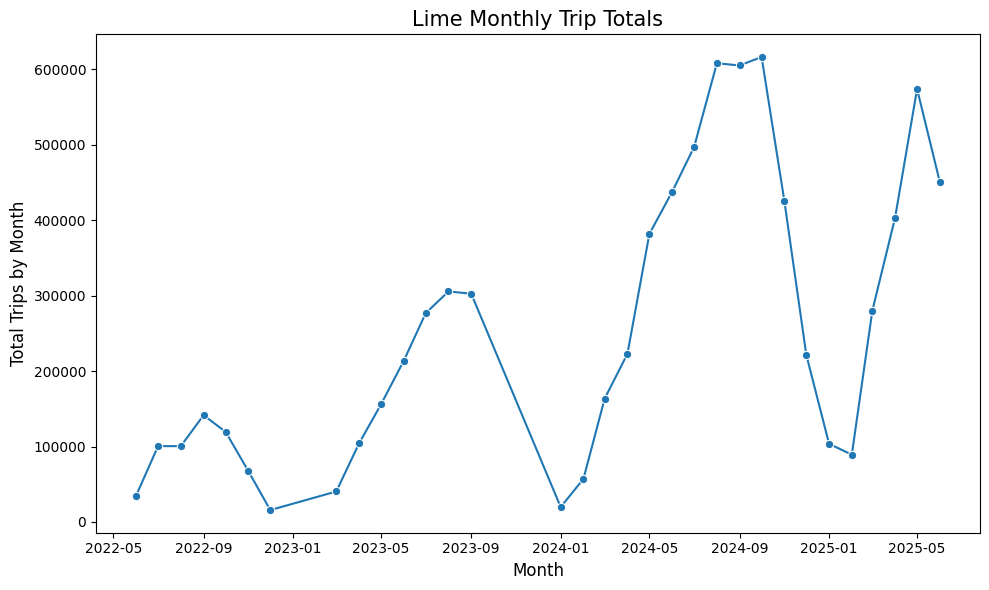

In [93]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=lime_df, x='month', y='count_trip_id', marker='o')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Trips by Month', fontsize=12)
plt.title('Lime Monthly Trip Totals', fontsize=15)

plt.tight_layout()
plt.show()


In [94]:
lime_df['year'] = lime_df['month'].dt.year

yearly_trip_totals = lime_df.groupby('year')['count_trip_id'].sum()

growth_pct = (((yearly_trip_totals[2024] - yearly_trip_totals[2023]) / yearly_trip_totals[2023]) * 100).round(2)

print(f'Lime grew {growth_pct}% from 2023 to 2024')

Lime grew 204.25% from 2023 to 2024


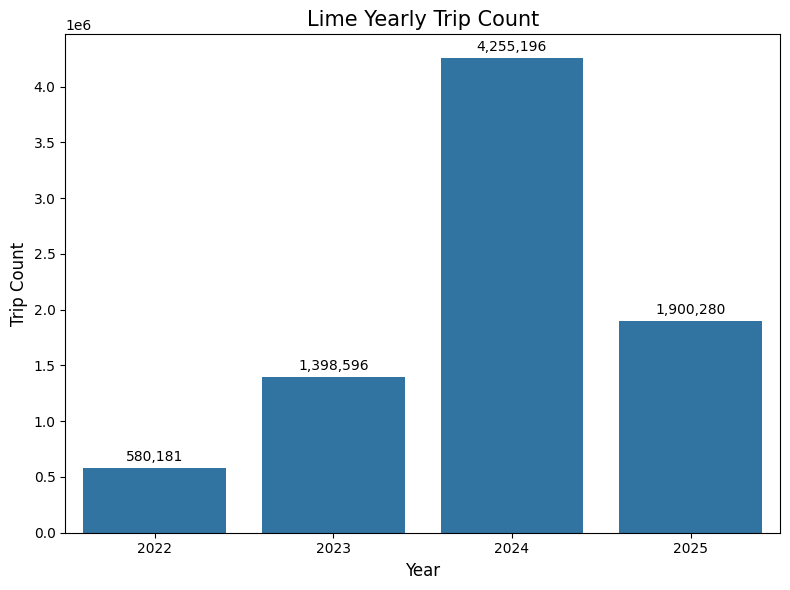

In [95]:
plt.figure(figsize=(8,6))

lime_yearly_plot_df = yearly_trip_totals.reset_index()

ax = sns.barplot(data=lime_yearly_plot_df, x='year', y='count_trip_id')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Trip Count', fontsize=12)
plt.title('Lime Yearly Trip Count', fontsize=15)

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

In [96]:
yearly_trip_totals.info()

<class 'pandas.core.series.Series'>
Index: 4 entries, 2022 to 2025
Series name: count_trip_id
Non-Null Count  Dtype
--------------  -----
4 non-null      int64
dtypes: int64(1)
memory usage: 188.0 bytes


In [97]:
scooter_trips

,vendor,count_trip_id,market_share
0,Lime,8134253,63.52
1,Lyft,4238610,33.10
2,Spin,305838,2.39
3,Link,126573,0.99
4,Coco,342,0.00


In [98]:
params = {
    # 1. Truncate the date to just Year and Month
    # 2. Count the trips in that month
    '$select': "vendor, date_trunc_ym(start_time) AS month, count(trip_id)",
    
    
    
    # Group by that new 'month' column we created
    '$group': "vendor, month",
    
    # Sort it so the dates are in order
    '$order': "month ASC"
}
response_all = requests.get(endpoint, headers=headers, params=params)

data_all = response_all.json()

all_vendor_df = pd.DataFrame(data_all)

all_vendor_df.head()

,vendor,month,count_trip_id
0,Link,2022-05-01T00:00:00.000,10
1,Lyft,2022-05-01T00:00:00.000,41650
2,Lime,2022-06-01T00:00:00.000,34837
3,Link,2022-06-01T00:00:00.000,1893
4,Lyft,2022-06-01T00:00:00.000,123168


In [99]:
all_vendor_df['month'] = pd.to_datetime(all_vendor_df['month'])

all_vendor_df

,vendor,month,count_trip_id
0,Link,2022-05-01,10
1,Lyft,2022-05-01,41650
2,Lime,2022-06-01,34837
3,Link,2022-06-01,1893
4,Lyft,2022-06-01,123168
...,...,...,...
103,Lyft,2025-04-01,83316
104,Lime,2025-05-01,573776
105,Lyft,2025-05-01,101476
106,Lime,2025-06-01,450577


In [100]:
all_vendor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   vendor         108 non-null    object        
 1   month          108 non-null    datetime64[ns]
 2   count_trip_id  108 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.7+ KB


In [101]:
all_vendor_df['count_trip_id'] = pd.to_numeric(all_vendor_df['count_trip_id'])

all_vendor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   vendor         108 non-null    object        
 1   month          108 non-null    datetime64[ns]
 2   count_trip_id  108 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.7+ KB


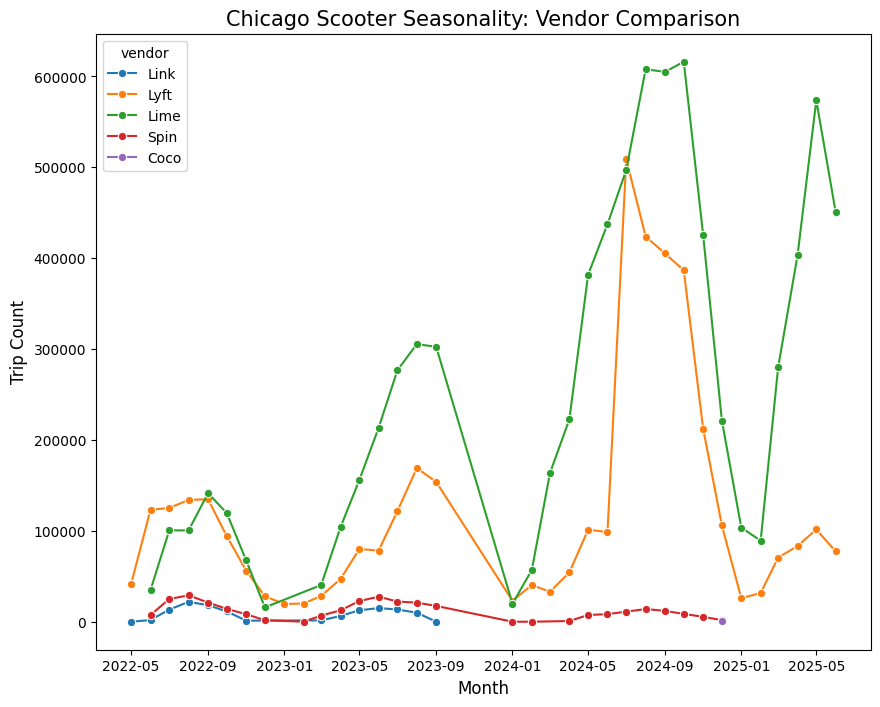

In [102]:
plt.figure(figsize=(10,8))

sns.lineplot(data=all_vendor_df, x='month', y='count_trip_id', hue='vendor', marker='o')

plt.title('Chicago Scooter Seasonality: Vendor Comparison', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Trip Count', fontsize=12)
plt.show()


In [103]:
params = {
    '$select': 'vendor, trip_distance, trip_duration, start_community_area_name',
    '$where': 'trip_distance > 0 AND trip_duration > 0 AND start_community_area_name IS NOT NULL',
    '$limit': 100000
}

respsonse_speed = requests.get(endpoint, headers=headers, params=params)

speed_df = pd.DataFrame(respsonse_speed.json())
speed_df.head()

,vendor,trip_distance,trip_duration,start_community_area_name
0,Lime,593,209,Auburn Gresham
1,Spin,2685,604,North Center
2,Lime,1606,532,Uptown
3,Lime,72,210,Avondale
4,Lime,1671,2189,Avondale


In [104]:
speed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   vendor                     100000 non-null  object
 1   trip_distance              100000 non-null  object
 2   trip_duration              100000 non-null  object
 3   start_community_area_name  100000 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


In [105]:
speed_df['trip_distance'] = pd.to_numeric(speed_df['trip_distance'])
speed_df['trip_duration'] = pd.to_numeric(speed_df['trip_duration'])

speed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   vendor                     100000 non-null  object
 1   trip_distance              100000 non-null  int64 
 2   trip_duration              100000 non-null  int64 
 3   start_community_area_name  100000 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.1+ MB


In [106]:
speed_df.head()

,vendor,trip_distance,trip_duration,start_community_area_name
0,Lime,593,209,Auburn Gresham
1,Spin,2685,604,North Center
2,Lime,1606,532,Uptown
3,Lime,72,210,Avondale
4,Lime,1671,2189,Avondale


In [107]:
speed_df['mph'] =  ((speed_df['trip_distance'] / 1609) / (speed_df['trip_duration'] / 3600)).round(2)

speed_df.sort_values('mph', ascending=False).head()

,vendor,trip_distance,trip_duration,start_community_area_name,mph
36620,Spin,55582,626,West Town,198.66
98789,Lyft,94,2,Near North Side,105.16
24082,Lyft,4134,91,Near West Side,101.64
3399,Lyft,69,2,Loop,77.19
79745,Lyft,67,2,Near North Side,74.95


In [108]:
#removing mph outliers

speed_df = speed_df[(speed_df['mph'] > 0) & (speed_df['mph'] < 25)]

speed_df.head()

,vendor,trip_distance,trip_duration,start_community_area_name,mph
0,Lime,593,209,Auburn Gresham,6.35
1,Spin,2685,604,North Center,9.95
2,Lime,1606,532,Uptown,6.75
3,Lime,72,210,Avondale,0.77
4,Lime,1671,2189,Avondale,1.71


In [109]:
neighborhood_speeds = speed_df.groupby('start_community_area_name')['mph'].mean().sort_values(ascending=False).reset_index()

print('Top 5 Highest Neighborhood Speeds')
print(neighborhood_speeds.head(5))

print('Top 5 Lowest Neighborhood Speeds')
print(neighborhood_speeds.tail(5))

Top 5 Highest Neighborhood Speeds
  start_community_area_name       mph
0           Lower West Side  7.768295
1              Norwood Park  7.566667
2                Bridgeport  7.557644
3               Edison Park  7.502500
4            Jefferson Park  7.495882
Top 5 Lowest Neighborhood Speeds
   start_community_area_name       mph
72            North Lawndale  4.837052
73                  New City  4.809644
74               Morgan Park  3.927194
75           Mount Greenwood  3.637500
76                 Riverdale  2.712593


In [110]:
params = {
    '$select': 'start_community_area_name, count(trip_id)',
    '$where': 'trip_distance > 0 AND trip_duration > 0 AND start_community_area_name IS NOT NULL',
    '$group': 'start_community_area_name',
    '$order': 'count_trip_id DESC'
}

neighborhood_demand = requests.get(endpoint, headers=headers, params=params)

demand_df = pd.DataFrame(neighborhood_demand.json())
demand_df.head()

,start_community_area_name,count_trip_id
0,Near North Side,1225462
1,Lake View,1100613
2,Near West Side,1013043
3,Lincoln Park,1012987
4,Loop,833314


In [111]:
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   start_community_area_name  77 non-null     object
 1   count_trip_id              77 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [112]:
demand_df['count_trip_id'] = pd.to_numeric(demand_df['count_trip_id'])

demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   start_community_area_name  77 non-null     object
 1   count_trip_id              77 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


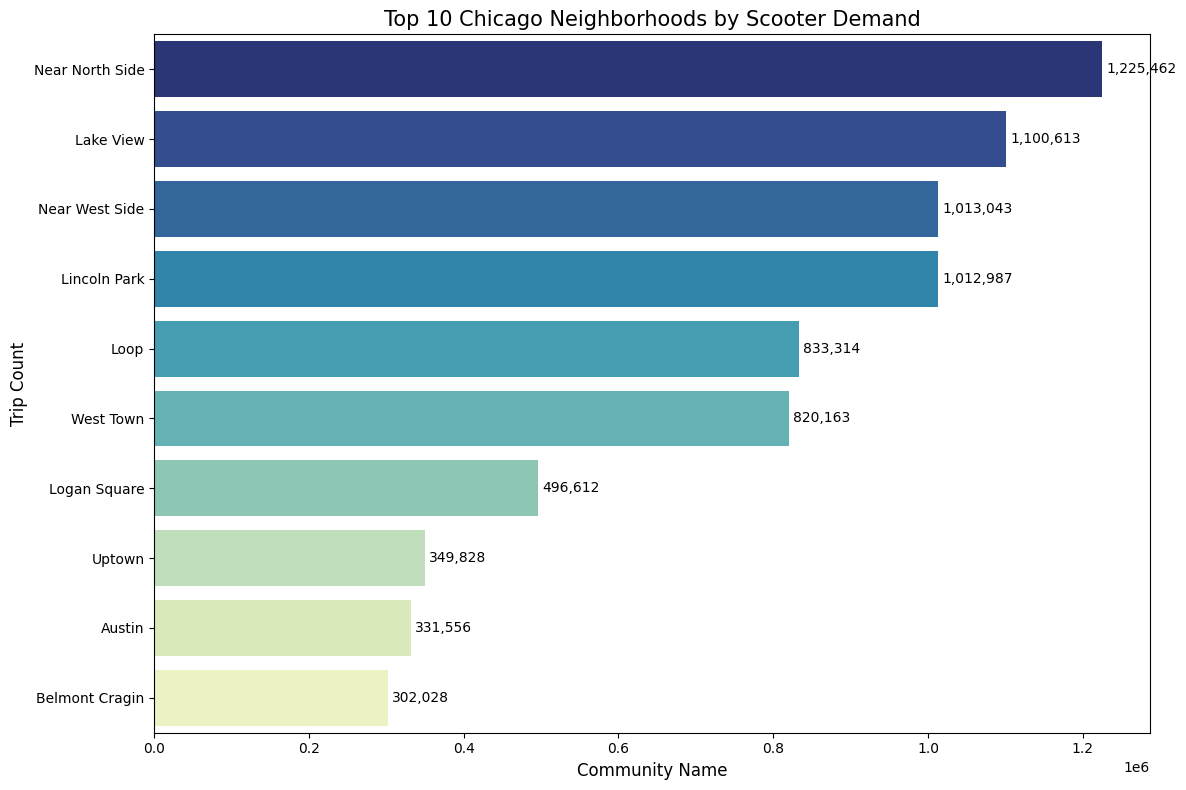

In [113]:
top_ten = demand_df.head(10)

plt.figure(figsize=(12,8))

ax = sns.barplot(
    data=top_ten,
    x='count_trip_id',
    y='start_community_area_name',
    palette='YlGnBu_r',
    hue='start_community_area_name'
)

plt.title('Top 10 Chicago Neighborhoods by Scooter Demand', fontsize=15)
plt.xlabel('Community Name', fontsize=12)
plt.ylabel('Trip Count', fontsize=12)
[ax.bar_label(c, fmt='{:,.0f}', padding=3) for c in ax.containers]

plt.tight_layout()
plt.show()

In [114]:
ghost_params = {
  '$select': 'vendor, count(trip_id)',
  '$where': 'trip_distance = 0 AND trip_duration > 30',
  '$group': 'vendor',
  '$order': 'count_trip_id DESC'
}

ghost_riders = requests.get(endpoint, headers=headers, params=ghost_params)
ghost_riders = pd.DataFrame(ghost_riders.json()).sort_index()

ghost_riders.head()

,vendor,count_trip_id
0,Lyft,91936
1,Lime,89032
2,Link,2393
3,Spin,815
4,Coco,2


In [115]:
ghost_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   vendor         5 non-null      object
 1   count_trip_id  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [116]:
ghost_riders['count_trip_id'] = pd.to_numeric(ghost_riders['count_trip_id'])

ghost_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   vendor         5 non-null      object
 1   count_trip_id  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


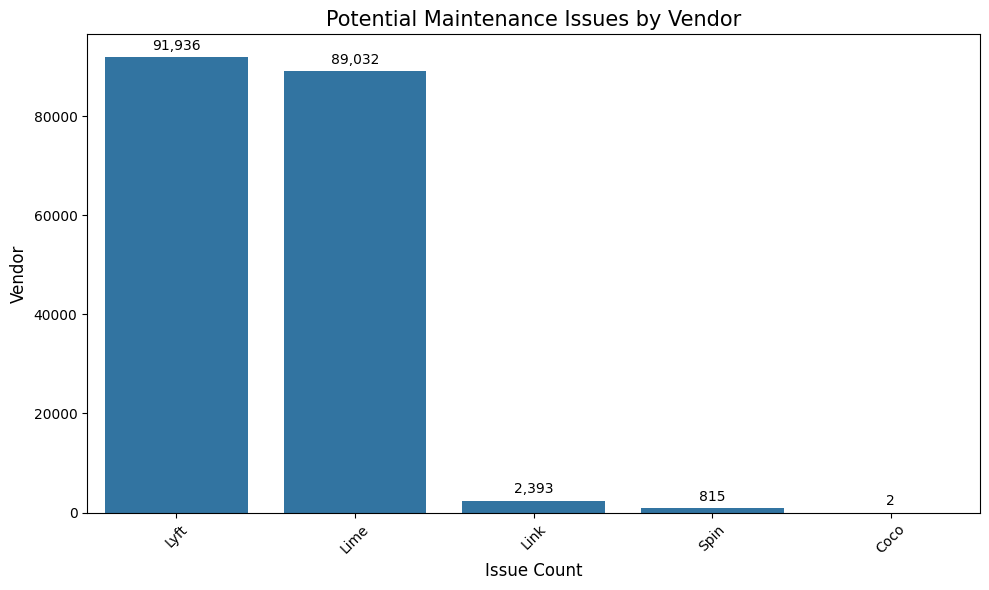

In [117]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=ghost_riders, x='vendor', y='count_trip_id')
plt.xticks(rotation=45)
plt.title('Potential Maintenance Issues by Vendor', fontsize=15)
[ax.bar_label(c, fmt='{:,.0f}', padding=3) for c in ax.containers]
plt.xlabel('Issue Count', fontsize=12)
plt.ylabel('Vendor', fontsize=12)

plt.tight_layout()
plt.show()

In [129]:
all_trip_master = pd.merge(ghost_riders, scooter_trips, how='left', on='vendor')
all_trip_master.rename(columns={'count_trip_id_y': 'total_trips', 'count_trip_id_x': 'ghost_trips'}, inplace=True)
all_trip_master['failure_rate_pct'] = (all_trip_master['ghost_trips'] / all_trip_master['total_trips']) * 100
all_trip_master

,vendor,ghost_trips,total_trips,market_share,failure_rate_pct
0,Lyft,91936,4238610,33.10,2.169013
1,Lime,89032,8134253,63.52,1.094532
2,Link,2393,126573,0.99,1.890609
3,Spin,815,305838,2.39,0.266481
4,Coco,2,342,0.00,0.584795


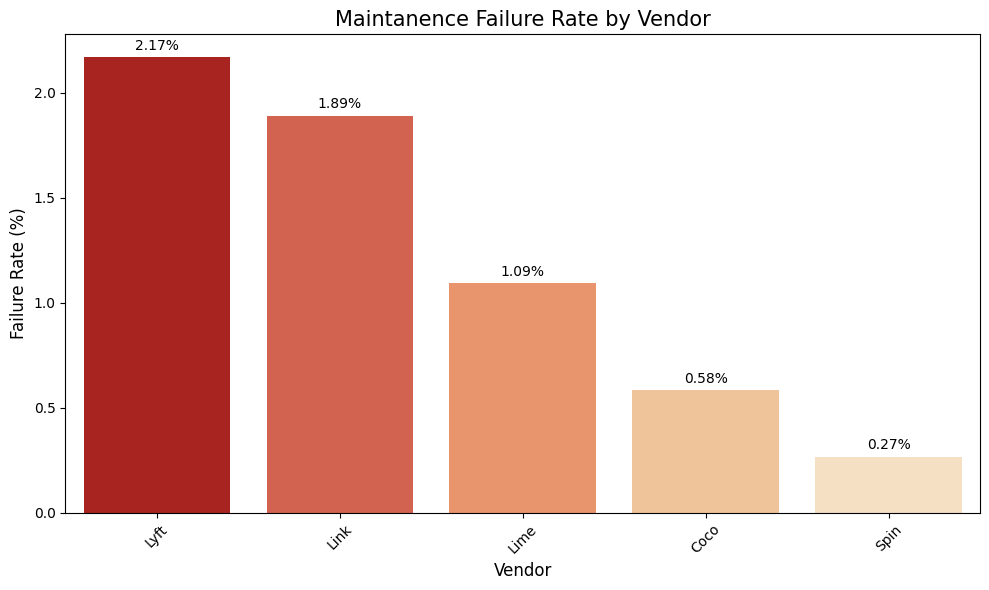

In [136]:
plt.figure(figsize=(10,6))

plot_df = all_trip_master.sort_values('failure_rate_pct', ascending=False)

ax = sns.barplot(data=plot_df, x='vendor', y='failure_rate_pct', palette='OrRd_r', hue='vendor')

plt.title('Maintanence Failure Rate by Vendor', fontsize=15)
plt.ylabel('Failure Rate (%)', fontsize=12)
plt.xlabel('Vendor', fontsize=12)
plt.xticks(rotation=45)

[ax.bar_label(c, fmt='%.2f%%', padding=3) for c in ax.containers]

plt.tight_layout()
plt.show()